In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("data/HousePrice/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### 找出那些自變數（或是特徵）是有缺值的

##### 採用的方法是 mean 得知缺值占該變數的比例

In [3]:
#非0為真，0為假(False)，所以先用isnull轉成TureFalse再取mean
var_na = [col for col in data.columns if data[col].isnull().mean() > 0]
var_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

##### 完整資料分析（CCA）就是刪除空值，但其使用前提是資料的缺失是隨機的（MCAR），而且缺失比例不能大於5%

##### 欄位中的缺失值要小於5%才算是CCA(完整資料分析)

In [11]:
cca = [col for col in data.columns if data[col].isnull().mean() < 0.05]
cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [5]:
#接著我們要把上面這些變數的缺失值全部drop掉，總共drop掉了48筆資料
cca_drop = data[cca].dropna()

In [6]:
cca_drop.shape,data.shape

((1412, 70), (1460, 81))

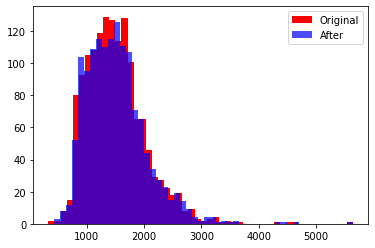

In [8]:
#接下來，我們來看一下CCA後的資料變動，我們拿GrLivArea這個變數為例
#可以看到整體資料的分布並沒有變太多，這也是為什麼我們要設0.05的原因
plt.hist(data['GrLivArea'], bins=50, color='red', label='Original')
plt.hist(cca_drop['GrLivArea'], bins=50, color='blue', alpha=0.7, label='After')
plt.legend();

##### 除了完整資料分析外我們還有平均數與中位數插值法，那什麼時候該用平均數跟中位數呢？當資料是常態分佈時我們可以利用平均數跟中位數因為這兩個數字基本上差異不大，但是當資料呈現負偏態的時候用中位數會更貼近現實，因為平均數會被離群值影響，相對的當資料呈現正偏態的時候使用中位數也是一個較好的選擇

In [15]:
data.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [16]:
#用三個變數來示範(SalesPrice則是我們要預測的數字)，3個變數的缺失比例從0.5% ~ 17.7%都有
data = data[["MasVnrArea", "GarageYrBlt", "LotFrontage", "SalePrice"]]
data.isnull().mean()*100

MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
SalePrice       0.000000
dtype: float64

In [18]:
#接著來把資料做拆分
from sklearn.model_selection import train_test_split
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

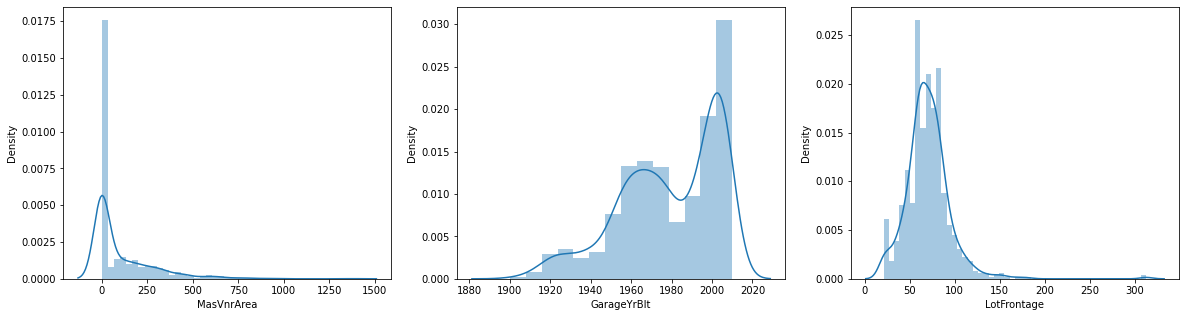

In [21]:
#接著來做中位數插值法，採用這個方法的原因是資料不是常態分布，我們可以用以下程式碼畫個簡單的圖表作分析
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()
sns.distplot(X_train['MasVnrArea'], ax=ax[0])
sns.distplot(X_train['GarageYrBlt'], ax=ax[1])
sns.distplot(X_train['LotFrontage'], ax=ax[2])

In [25]:
#接著來插數字
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X_train)
X_train_transformed = imp.transform(X_train)

#我們把完成的資料轉變成dataframe是為了後續作圖方便，因為transform完的資料會回傳array而不是dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns=data.columns[0: -1])

In [26]:
#接著我們先從變異數來比較其後的差異
# 我們可以看到，即便只有缺失0.5%的資料，經過中位數插值法後變異數差異也會達到55
for col in X_train.columns:
    print(f"col {col}'s variance is {np.var(X_train[col])} before median imputation")
    print(f"col {col}'s variance is {np.var(X_train_transformed[col])} after median imputation")
    print(f"difference is {abs(np.var(X_train_transformed[col]) - np.var(X_train[col]))}\n")

col MasVnrArea's variance is 29798.679649948328 before median imputation
col MasVnrArea's variance is 29743.6366445058 after median imputation
difference is 55.04300544252692

col GarageYrBlt's variance is 615.1299507803428 before median imputation
col GarageYrBlt's variance is 582.7156193871807 after median imputation
difference is 32.414331393162115

col LotFrontage's variance is 651.1814903846154 before median imputation
col LotFrontage's variance is 530.1416354869964 after median imputation
difference is 121.03985489761897



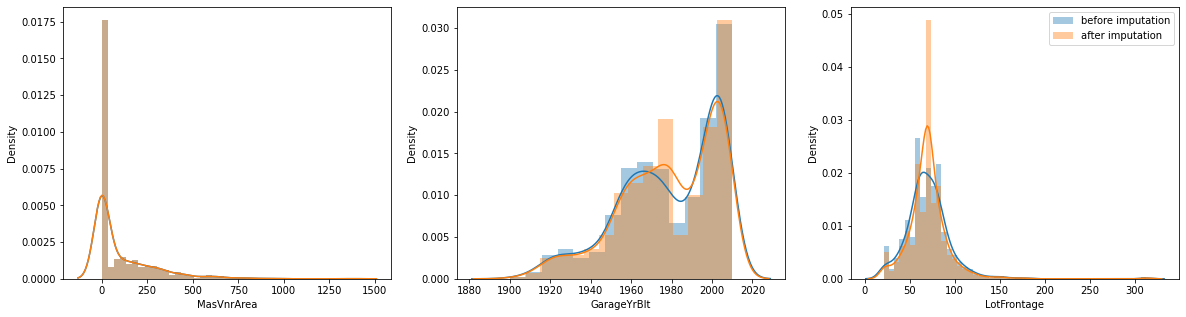

In [27]:
#接著來看圖，我們可以看到，使用這個插值法的前後，會對資料的分布狀況造成一定影響的，尤其是缺失值比例越大的時候越嚴重！
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()
sns.distplot(X_train["MasVnrArea"], ax=ax[0], label="before imputation")
sns.distplot(X_train_transformed["MasVnrArea"], ax=ax[0], label="after imputation")
sns.distplot(X_train["GarageYrBlt"], ax=ax[1], label="before imputation")
sns.distplot(X_train_transformed["GarageYrBlt"], ax=ax[1], label="after imputation")
sns.distplot(X_train["LotFrontage"], ax=ax[2], label="before imputation")
sns.distplot(X_train_transformed["LotFrontage"], ax=ax[2], label="after imputation")
plt.legend();